In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np


In [2]:
# import cleaned path
clean_df_path = 'clean.csv'

# pandas read csv
clean_df = pd.read_csv(clean_df_path)

# preview
clean_df.head(1)

,race_date,race_city,race_no,race_type,race_sex_group,race_age_group,race_race_group,race_length,race_track_type,race_track_condition,...,horse_trainer,horse_race_degree,horse_win_value,horse_psf_rate,horse_psf_rank,Horse_starting_box_no,horse_margin,horse_late_start,horse_rate,unique_race_identifier
0,2024-01-01,Bursa,1,Condition 2,Undefined,3 Years Old,English,1400,Dirt,Good Going,...,TAMER TURAN,1.31.26,1.5,49,1,1,9 Lengths,NaN,42,2024-01-01_Bursa_1


In [9]:
#Find out race type distribution#What are the counts of each race type? 

race_type_counts = clean_df['race_type'].value_counts()
race_type_counts


race_type
Maiden         1015
Handicap 14     610
Condition 3     503
Handicap 15     470
Condition 4     441
Handicap 16     219
Condition 2     184
Condition 5     163
Condition-6     150
Handicap 13     104
Condition-8      94
Condition 1      85
Handicap 21      63
Handicap 17      57
Sale 1           51
Sale 2           33
Condition-7      16
G 3              15
Sale 3            6
Condition-9       4
Name: count, dtype: int64

In [13]:
# Calculate the total number of unique races
#Count the unique values of the combination of race date, race city and race number should produce the total race numbers

unique_races = clean_df.drop_duplicates(subset=['race_date', 'race_city', 'race_no'])

# Count the unique races
total_race_count = unique_races.shape[0]

print(f"Total number of races: {total_race_count}")

Total number of races: 480


In [16]:
# Create a unique identifier for each race. This added one column to the dataframe
clean_df['unique_race_identifier'] = clean_df['race_date'].astype(str) + '_' + clean_df['race_city'].astype(str) + '_' + clean_df['race_no'].astype(str)

# Group by 'race_sex_group' and count unique 'unique_race_identifier'
races_per_sex_group = clean_df.groupby('race_sex_group')['unique_race_identifier'].nunique()

print(races_per_sex_group)

race_sex_group
Female       118
Undefined    362
Name: unique_race_identifier, dtype: int64


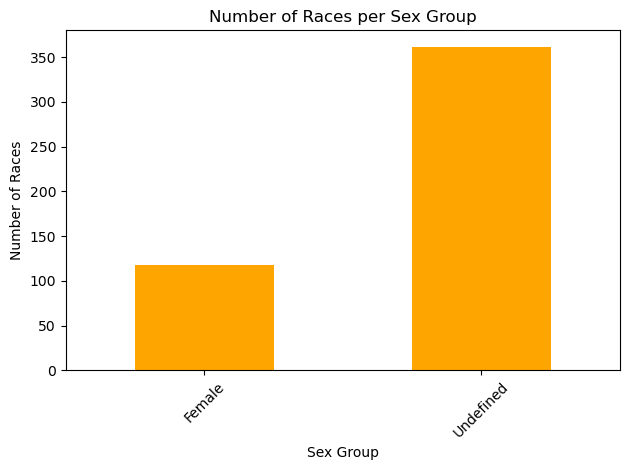

In [44]:
#Plot

races_per_sex_group.plot(kind='bar', color='orange')
plt.title('Number of Races per Sex Group')
plt.xlabel('Sex Group')
plt.ylabel('Number of Races')
plt.xticks(rotation=45)
plt.tight_layout()  
plt.show()

In [20]:
# Create a unique identifier for each race. This added one column to the dataframe
clean_df['unique_race_identifier'] = clean_df['race_date'].astype(str) + '_' + clean_df['race_city'].astype(str) + '_' + clean_df['race_no'].astype(str)

# Group by 'race_sex_group' and count unique 'unique_race_identifier'
races_per_city = clean_df.groupby('race_city')['unique_race_identifier'].nunique()

print(races_per_city)

race_city
Adana        100
Antalya       75
Bursa         45
Kocaeli       36
İstanbul      72
İzmir         86
Şanlıurfa     66
Name: unique_race_identifier, dtype: int64


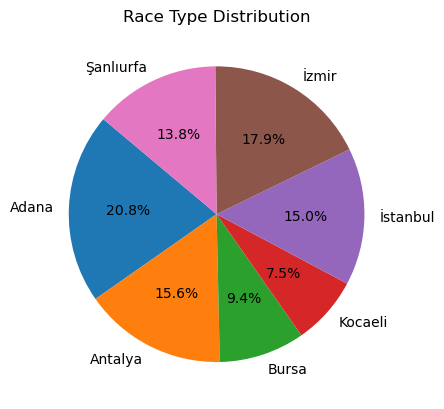

In [19]:
# Creating a new Series for the plot
#plot_type_distribution = race_types_80
plot_per_city = races_per_city
#Add other types to plot_data
#if other_percentage > 0:
    #plot_type_distribution['Other Types'] = other_percentage

# Plotting
plot_per_city.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Race Type Distribution')
plt.ylabel('')  
plt.show()


In [26]:
clean_df.columns

Index(['race_date', 'race_city', 'race_no', 'race_type', 'race_sex_group',
       'race_age_group', 'race_race_group', 'race_length', 'race_track_type',
       'race_track_condition', 'best_rating', 'result', 'horse_name',
       'horse_accessories', 'horse_age', 'horse_sex', 'horse_sire',
       'horse_dam', 'hors_broodmare_sire', 'jockey_weight', 'jockey_name',
       'horse_owner', 'horse_trainer', 'horse_race_degree', 'horse_win_value',
       'horse_psf_rate', 'horse_psf_rank', 'Horse_starting_box_no',
       'horse_margin', 'horse_late_start', 'horse_rate',
       'unique_race_identifier'],
      dtype='object')

<Axes: xlabel='race_sex_group'>

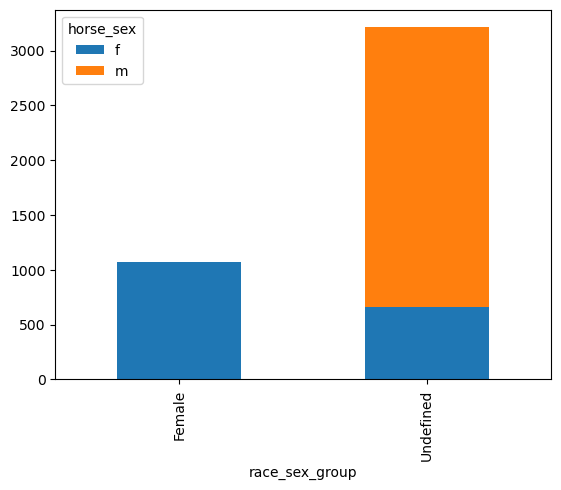

In [35]:
clean_df.pivot_table(columns='horse_sex', index='race_sex_group', aggfunc='size') \
        .plot(kind='bar', stacked=True)

<Axes: xlabel='race_city'>

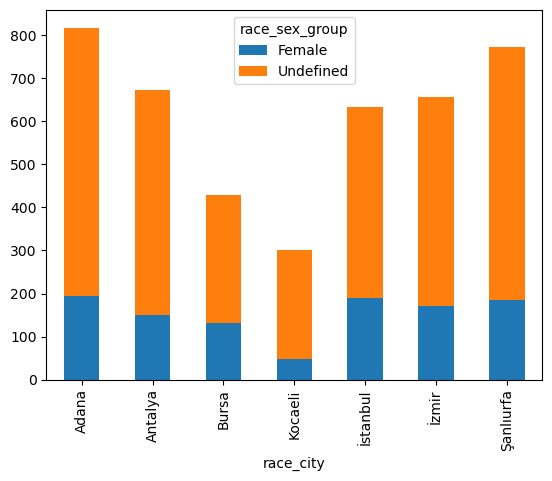

In [34]:
clean_df.pivot_table(columns='race_sex_group', index='race_city', aggfunc='size') \
        .plot(kind='bar', stacked=True)

<Axes: xlabel='race_city,race_sex_group'>

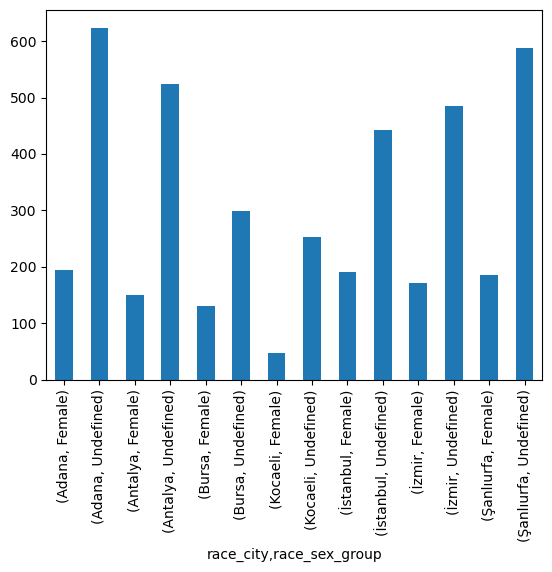

In [28]:
clean_df.groupby(['race_city', 'race_sex_group']).size().plot(kind='bar')

In [25]:
clean_df.head()

,race_date,race_city,race_no,race_type,race_sex_group,race_age_group,race_race_group,race_length,race_track_type,race_track_condition,...,horse_trainer,horse_race_degree,horse_win_value,horse_psf_rate,horse_psf_rank,Horse_starting_box_no,horse_margin,horse_late_start,horse_rate,unique_race_identifier
0,2024-01-01,Bursa,1,Condition 2,Undefined,3 Years Old,English,1400,Dirt,Good Going,...,TAMER TURAN,1.31.26,1.50,49,1,1,9 Lengths,NaN,42,2024-01-01_Bursa_1
1,2024-01-01,Bursa,1,Condition 2,Undefined,3 Years Old,English,1400,Dirt,Good Going,...,TUNCAY PELEN,1.33.05,3.75,20,2,4,Half Lengths,NaN,43,2024-01-01_Bursa_1
2,2024-01-01,Bursa,1,Condition 2,Undefined,3 Years Old,English,1400,Dirt,Good Going,...,KAZIM ŞENGEL,1.33.17,28.70,3,6,3,3 Lengths,NaN,33,2024-01-01_Bursa_1
3,2024-01-01,Bursa,1,Condition 2,Undefined,3 Years Old,English,1400,Dirt,Good Going,...,ALİ RIZA AYDIN,1.33.65,14.85,3,5,6,4 Lengths,NaN,39,2024-01-01_Bursa_1
4,2024-01-01,Bursa,1,Condition 2,Undefined,3 Years Old,English,1400,Dirt,Good Going,...,MURAT TÜRKOĞLU,1.34.30,4.55,17,3,5,NaN,NaN,51,2024-01-01_Bursa_1


In [24]:
races_per_city.head()

race_city
Adana       100
Antalya      75
Bursa        45
Kocaeli      36
İstanbul     72
Name: unique_race_identifier, dtype: int64

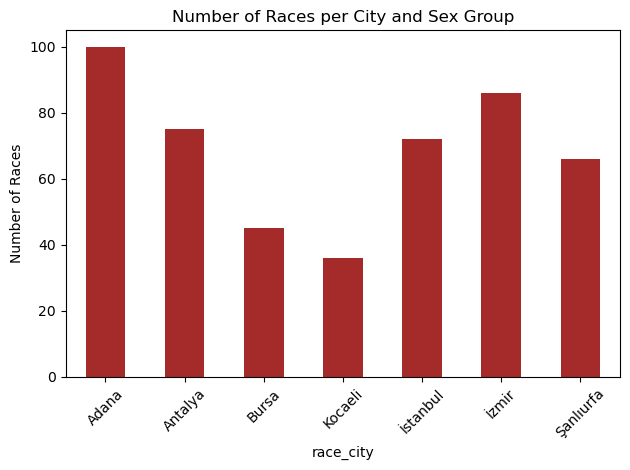

In [23]:
#Plot

races_per_city.plot(kind='bar', color='green')
plt.title('Number of Races per City and Sex Group')
plt.xlabel('race_city')
plt.ylabel('Number of Races')
plt.xticks(rotation=45)
plt.tight_layout()  
plt.show()